# Simulación de Contagio en Sistemas Sociales

Jorge Velázquez Castro  
FCFM-BUAP  
https://www.researchgate.net/profile/Jorge_Velazquez-Castro

## Propagación de rumores

Consider a population of fixed size K in which a rumor is being spread by word
of mouth. Let y(t) be the number of people who have heard the rumor at time
t and assume that everyone who has heard the rumor passes it on to r others in
unit time. Thus, from time t to time (t+h). the rumor is passed on hry(t) times,
but a fraction y(t)/K of the people who hear it have already heard it, and thus
there are only $hry(t)[
K−y(t)/K]$
people who hear the rumor for the first time. 

One person in a village of 100 inhabitants starts a rumor. Suppose that
everyone who hears the rumor tells one other person per day. How long it will take until half the village has heard the rumor?.



### El modelo

Lo anterior se puede modelar por un sistema de ecuaciones diferenciales

$ \frac{dx}{dt}=-ry\frac{x}{K} \\
 \frac{dy}{dt}=ry\frac{x}{K} $
 
 donde,
 
 x : personas que no han escuchado el rumor
 
 y : personas que han escuchado el rumor.
 
 Como parámetros constantes tenemos
 
 r : Número promedio de veces que una persona se cuenta el rumor por unidad de tiempo
 
 K : Tamaño de la población

### Simulación en lenguaje python

Primero importamos las librerias necesarias.

odeint : función que resuelve sistemas de ecuaciones diferenciales numéricamente

numpy : para manejar vectores de forma eficiente

matplotlib.pyplot : para graficar

matplotlib : para especificar la presentación de la gráfica

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
#from pylab import *  # for plotting commands
import matplotlib
matplotlib.rc('xtick', labelsize=18)
matplotlib.rc('ytick', labelsize=18)
matplotlib.rc('axes', labelsize=18)


El modelo lo codificamos en una función.

Recordemos que el modelo es

$ \frac{dx}{dt}=-ry\frac{x}{K} \\
 \frac{dy}{dt}=ry\frac{x}{K} $

In [2]:
def model(z,t):
    x=z[0]
    y=z[1]
    dx=-r*y*x/K
    dy=r*y*x/K
    return np.array([dx,dy])

Tenemos que dar valor a los parámetros

r = 2.0 significa que un individuo en promedio cuenta el rumor 2 veces en un día

K = 100.0 nuestra población consta de 100 individuos

In [3]:
#parametros
r=2.0
K=100

Tenemos que indicar como fue que empezó todo. Aunque no nos referimos a la historia.

Nos refermios a las condiciones iniciales:
    
$x_{0}=99.0$ : Significa que 99 personas no sabían del rumor
        
$y_{0}=1$ : Significa que todo empezó por 1 chismoso.

In [4]:
#Condiciones iniciales
x0=K-1.
y0=1.

Es necesario especificar cuanto tiempo queremos simular. No nos referemios a cuanto queremos que tarde la simulación :)

In [5]:
time = np.linspace(0.0,10.0,100)

Resolvemos el sistema con ayuda de la función odeint

model : la función que nos define el modelo

[x0,y0] : las condiciones iniciales

time : intervalo de tiempo de la simulación

y_evol : matriz donde guardaremos el resultado

In [6]:
y_evol = odeint(model,[x0,y0],time)

Ya tenemos el resultado en 'y_evol'. ¿Y ahora que?

Lo visualizamos por medio de una gráfica.

¿Recuredan que al inicio escribimos 'import matplotlib.pyplot as plt'?

Este comando nos permite utilizar varias funciones para graficar

La función principal tiene la siguiente estructura, 

plt.plot(t,y) : grafica la variable y contra t. Es decir y=y(t).

En concreto, t es un vector t=$ \begin{bmatrix} t_{0} \\ t_{1} \\ t_{2} \\ t_{3} \\ \vdots \end{bmatrix} $

y es otro vector y=$ \begin{bmatrix} y_{0} \\ y_{1} \\ y_{2} \\ y_{3} \\ \vdots \end{bmatrix} $.

Entonces, plt.plot(t,y) lo que hace es dibujar puntos en las coordenadas $(t_0,y_{0}), (t_{1},y_{1}), (t_{2},y_{3}), ...$ y luego unir los puntos con lineas.

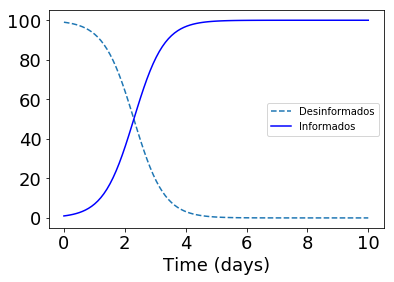

In [8]:
plt.xlabel('Time (days)')  #poner etiqueta del eje x
#plt.ylabel('')
plt.plot(time,y_evol[:,0],'--',label="Desinformados") #graficar variable time vs y_evol[:,0]
plt.plot(time,y_evol[:,1],'b',label="Informados")
plt.legend() #mostrar las leyendas
plt.show() #finalmente tenemos que mostrar la grafica

A lo mejor se están preguntando lo que significa 'y_evol[:,0]'.

La solución de un sistema de ecuaciones se puede ver como una matriz, por ejemplo 

$ \begin{bmatrix} x_{0} & y_{0} \\ x_{1} & y_{1} \\ x_{2} & y_{2} \\ x_{3} & y_{3} \\ \vdots & \vdots \end{bmatrix}$

De modo que y_evol[:,0] significa todos los renglones de la primera columna. En la mayoría de los lenguajes de programación se empieza a numerar a partir del 0. Extraña convención, pero tiene su motivación por la forma en que trabajan las computadoras.

y_evol[:,0]= $ \begin{bmatrix} x_{0} \\ x_{1} \\ x_{2} \\ x_{3} \\ \vdots \end{bmatrix} $

Del mismo modo y_evol[:,1] son todos los renglones de la segunda columa

De esta forma el comando plt.plot(time,y_evol[:,0],'--',label="Desinformados") grafica el número de personas "Desinformadas" como función del tiempo.


## Modelo de propagación de obesidad

S : Suceptibles
    
E : Expuestos
    
$I_{1}$ : Obesos

R : Recuperados
    
N : Población total

$ S'=(1-p)\mu N  -k_{1}I_{1}\frac{S}{N} -\alpha S - D S\\
 E'=p\mu N  + k_{1} I_{1}\frac{S}{N} - a E - D E\\
 I_{1}' =a E - \rho_{1}I_{1} + \alpha S + \rho_{R} R - D I_{1} \\
 R' =  \rho_{1} I_{1} -\rho_{R} R -D R $

Expliquemos los parámetros:
    
$\mu$ : Tasa de natalidad  
$p$ : probablidad de nacer en un ambiente de personas obesas  
$k_{1}$ : Grado de influencia que las personas obesas ejercen sobre los habitos de los demás  
$\alpha$ : tasa de transición intrínseca de expuesto a obeso  
$D$ : tasa de mortalidad  
$a$ : tasa de transición de persona expuesta a obesa  
$\rho_{1}$ : tasa de recuperación  
$\rho_{R}$ : tasa de reincidencia

### Simulación computacional

Recordemos el modelo  
$ S'=(1-p)\mu N  -k_{1}I_{1}\frac{S}{N} -\alpha S - D S\\
 E'=p\mu N  + k_{1} I_{1}\frac{S}{N} - a E - D E\\
 I_{1}' =a E - \rho_{1}I_{1} + \alpha S + \rho_{R} R - D I_{1} \\
 R' =  \rho_{1} I_{1} -\rho_{R} R -D R $

In [9]:
def system(y,t):
    S=y[0]
    E=y[1]
    I1=y[2]
    R=y[3]
    N=S+E+I1+R
    dS=(1.-p)*mu*N  -k1*I1*S/N -alpha*S - D*S
    dE=p*mu*N  + k1*I1*S/N  - a*E   - D*E
    dI1=a*E - rho1*I1 + rho_R*R + alpha*S - D*I1
    dR=rho1*I1 - rho_R*R - D*R
    
    return np.array([dS,dE,dI1,dR])

Damos valor a los parámetros.

El valor de los parámetros se obtuvo de este artículo:  
Thomas, D. M., Weedermann, M., Fuemmeler, B. F., Martin, C. K., Dhurandhar, N. V., Bredlau, C., … Bouchard, C. (2014). Dynamic Model Predicting Overweight, Obesity, and Extreme Obesity Prevalence Trends. Obesity (Silver Spring, Md.), 22(2), 590-597. https://doi.org/10.1002/oby.20520

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3842399/


In [10]:
# parameters units in years
p=0.3 #30% of females pre-pregnancy BMI are classified overweight
mu=D=0.01229 # Birth and Dead rate
k1=0.4
alpha=0.05
a=0.05
rho1=0.003
rho_R=0.05

Simulamos una población de 320 individuos donde 20 comienzan obesos.

In [11]:
# condiciones inciales
Y=np.zeros(4)
Y[0]=S=300
Y[1]=E=0
Y[2]=I1=20
Y[3]=R=0

Resolvemos el sistema para 50 años

In [12]:
time = np.linspace(0.0,50.0,100)
y_evol = odeint(system,Y,time)

Finalmente graficamos el resultado

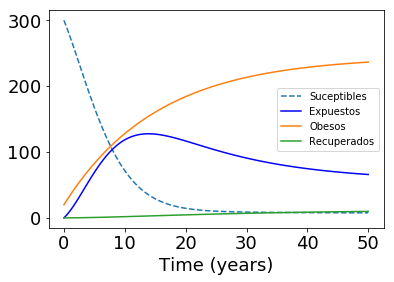

In [13]:
plt.xlabel('Time (years)')
#plt.ylabel('')
plt.plot(time,y_evol[:,0],'--',label="Suceptibles")
plt.plot(time,y_evol[:,1],'b',label="Expuestos")
plt.plot(time,y_evol[:,2],label="Obesos")
plt.plot(time,y_evol[:,3],label="Recuperados")
plt.legend()
plt.show()

## El modelo del votante

Este ejemplo utiliza un enfoque distinto. Aquí no emplearemos ecuaciones diferenciales

Aquí modelaremos individuos en lugar de poblaciones.

Los individuos están conectados por una red de amistad o bien de influencia.

Es una abstacción simplificada de la propagación de ideas contrarias. 

### El modelo

1) Un individuo elegido aleatoriamente se dispondrá a oir la opinión de sus amigos  
2) Uno de sus amigos elgido aleatoriamente le dice su opinión sobre un tema  
3) El individuo objetivo toma la misma opinión que su amigo  
4) Se repiten los pasos

### La implementación en python

Primero importamos las librerias necesarias

La librería importante es 'networkx' que aprenderán a usar en el siguiente taller.

In [14]:
import warnings
warnings.filterwarnings('ignore') #para que no salgan mensajes que no nos interesan
import networkx as nx #para representar la red
import random as rd #para generar números aleatorios
from IPython import display #para poder presentar la animación final
import matplotlib #para elegir los colores de los nodos de la red

Primero definiremos la función que nos inicializa el sistema

In [15]:
def initialize():
    global g        #variable que nos representa la red 
    g = nx.karate_club_graph() #una red predefinida en networkx
    g.pos = nx.spring_layout(g) #guardamos la posición de los nodos para dibujar siempre en la misma posición
    for i in g.nodes():  
        g.node[i]['state'] = 1 if rd.random() < .5 else 0 # para cada nodo elegimos que su estado sea 1 o 0 con 50% de probabilidad

Definimos la función que nos muestra la red.

Los nodos (individuos) de opinión "1" tendrán color negro  
Los nodos que tienen opinión "0" tendrán color gris

La función 'nx.draw' nos dibuja la red 'g'  
cmap : indica que paleta de color usar  
node_color : indica el color para cada nodo  
pos : indica la posición de cada nodo  

In [16]:
def observe():
    global g
    observe.counter += 1  
    display.clear_output(wait=True)
    nx.draw(g, cmap = matplotlib.cm.binary, vmin = -0.5, vmax = 1,
            node_color = [g.node[i]['state'] for i in g.nodes()],
            pos = g.pos)
    plt.title('tiempo={}'.format(observe.counter))
    plt.show()
observe.counter=0

La función update será la encargada de actualizar el sistema cada vez que hay un evento.

In [17]:
def update():
    global g
    listener = rd.choice(list(g.nodes())) #Se elige un individuo de la red que escuchará
    speaker = rd.choice(list(g.neighbors(listener))) # se elige un vecino del individuo que escucha
    g.node[listener]['state'] = g.node[speaker]['state'] # el estado del individuo que escucha será igual a la de su amigo.

El definir las funciones no ejecuta el código.

Tenemos que llamar a las funciones para ejecutar su códgo

Primero inicializamos el sistema

In [18]:
initialize()

Luego actualizamos y observamos la red.

Esperamos 0.2 segundos y repetimos para siempre ...

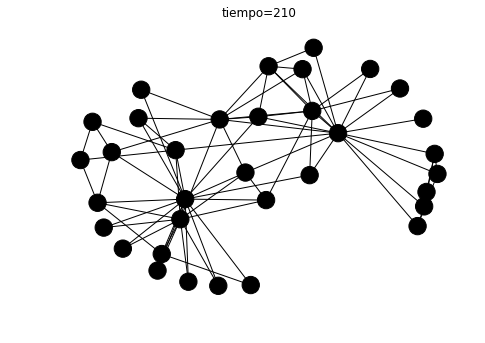

In [20]:
import time
while(True):
    try:
        update()
        observe()
        time.sleep(0.2)
    except KeyboardInterrupt:
        break

# Gracias!. Y disfruten.